# Basic introduction to currency objects

by: __Rodrigo Hernández Mota__

This short introduction aims to show a simple application for currency type for forex financial analysis. 

In [2]:
%matplotlib inline

from everything import *


## General Use

The type _currency_ was designed to facilitate the use, manipualtion and analysis of the financia data in the Forex Market. 

To declare a variable as type currency, just use **currency()** function in forex_data.py 

The main elements are:
* base: The base currency for the analysis 
* units: The value of the base currency in other units
* t0: initial day (format as yyyy/mm/dd) of the empirical data.
* tf: final day (format as yyyy/mm/dd) of the empirical data.

In [11]:
# Initialize currency
a = Currency(units='MXN', base = 'USD', t0 = '2015/01/01', tf = '2016/01/01')
b = Currency(units='CZK', base = 'USD', t0 = '2015/01/01', tf = '2016/01/01')
c = Stock(units='MXN',stock_name='BIMBOA.MX', t0 = '2015/01/01', tf = '2016/01/01')

Now, the variable **a** and **b** are type currency. 

In [4]:
type(a)

forex_data.currency

In [5]:
a.desc

'Foreign Exchange Rate'

In [4]:
for i in [a, b]:
    strval = [i.base, i.units, i.t0.strftime('%Y-%m-%d'), i.tf.strftime('%Y-%m-%d')]
    strg = 'The variable [a,b] contains information about the a base currency ({}) expressed in {} units, \nfrom initial time: {} to: {}'

    print(strg.format(*strval), '\n\n')

The variable [a,b] contains information about the a base currency (USD) expressed in MXN units, 
from initial time: 2015-01-01 to: 2016-01-01 


The variable [a,b] contains information about the a base currency (USD) expressed in CZK units, 
from initial time: 2015-01-01 to: 2016-01-01 




### Prices and returns 

To fill the variable with the financial data (prices) use the **.download()** function. To calculate the returns, use **.calc_returns()**. 

The prices are downloaded from Yahoo!'s database. If you want to save the data into a .csv (to increase read speed), manually create a in your directory a folder named 'general_database' and save the downloaded data by using: **.download(save = True)** The default is _save = False_.

The default configuration to calculate the returns is logarithmic, assuming: $ S_t = S_{t-1} e^r_t$
Where $r$ is the interest rate or return. Therefore $r_t = \log{(S_t / S_{t-1})}$

To use compund interest rate conventional formuta use: **.calc_returns(met_log = False)**.
In this case: $ S_t = S_{t-1} (1 + r_t)$.
And therefore: $r_t = \frac{S_t}{S_{t-1}} - 1$

In [14]:
# Download prices and calculate returns

a.download()
a.calc_returns()

# Or alternative; use fill()

b.fill()

In [13]:
# Use selenium to download prices

c.download(selenium=True)
c.prices.head()

,Adj_Close,Close,Date,High,Low,Open
0,48.30,48.30,"Feb,13, 2017",48.62,47.12,48.19
1,48.44,48.44,"Feb,10, 2017",48.95,47.00,47.20
2,47.23,47.23,"Feb,09, 2017",47.45,46.52,46.52
3,46.74,46.74,"Feb,08, 2017",47.73,46.50,47.03
4,47.03,47.03,"Feb,07, 2017",47.50,46.23,47.50


,Open,High,Low,Close,Adj_close
Date,,,,,
2015-01-01,14.7322,14.7322,14.7322,14.7322,14.7322
2015-01-02,14.7528,14.8630,14.7528,14.7528,14.7528
2015-01-05,14.8436,14.9396,14.8250,14.8436,14.8436
2015-01-06,14.9378,14.9897,14.8180,14.9394,14.9394
2015-01-07,14.8947,14.9138,14.7493,14.8947,14.8947


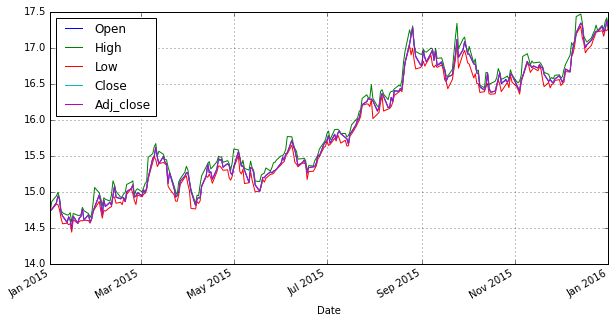

In [15]:
# Show prices 
a.prices.plot(grid = True, figsize=(10,5))
a.prices.head()

,Open,High,Low,Close,Adj_close
Date,,,,,
2015-01-02,0.001397,0.008839,0.001397,0.001397,0.001397
2015-01-05,0.006136,0.005141,0.004882,0.006136,0.006136
2015-01-06,0.006326,0.003348,-0.000472,0.006433,0.006433
2015-01-07,-0.002889,-0.005076,-0.004647,-0.002997,-0.002997
2015-01-08,-0.012505,-0.011763,-0.007916,-0.012464,-0.012464


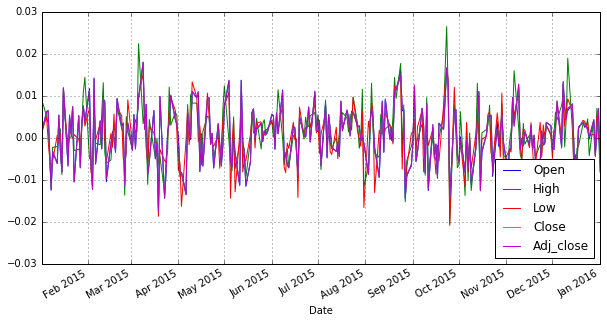

In [16]:
# Show returns

a.returns.plot(grid = True, figsize=(10,5))
a.returns.head()

count    260.000000
mean       0.000611
std        0.006627
min       -0.017662
25%       -0.003381
50%        0.000930
75%        0.005353
max        0.017960
Name: Adj_close, dtype: float64


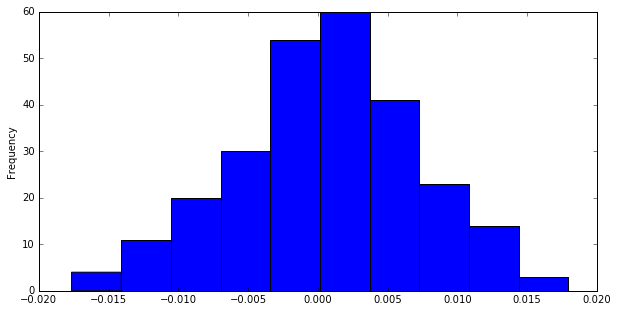

In [17]:
# Show histogram of returns
print(a.returns.Adj_close.describe())
a.returns.Adj_close.plot(kind = 'hist', figsize=(10,5))

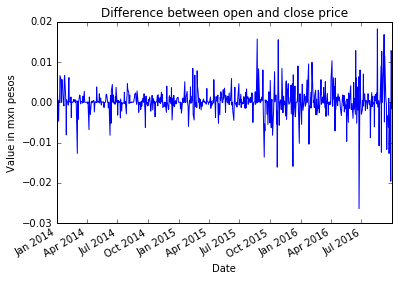

In [96]:
# Difference among the open price and the close price. 

plt.figure()
(a.prices.Open - a.prices.Close).plot()
plt.title('Difference between open and close price')
plt.ylabel('Value in mxn pesos')
plt.show()

As it can be seen, by using type currency the data is stored in memory as a Pandas DataFrame; therefore all the benefits of this datatype are included. 

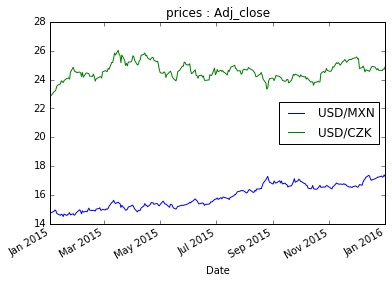

In [18]:
# Plot both variables 

a.plot(b)

### Monte Carlo Simulations

This datatype allows the user to perform Monte Carlo simulations.

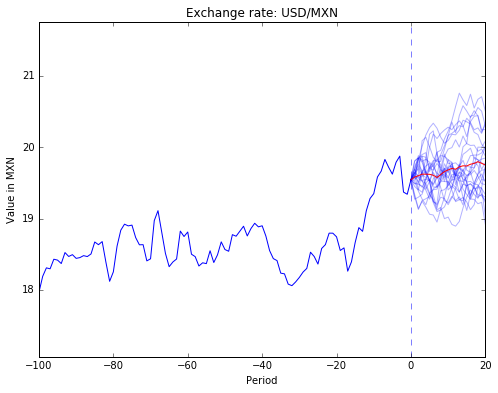

The expected value of the exchange rate in 20 periods is: 19.752597116221217


19.752597116221217

In [5]:
a.montecarlo_simul()

Change the periods and number of trayectories:

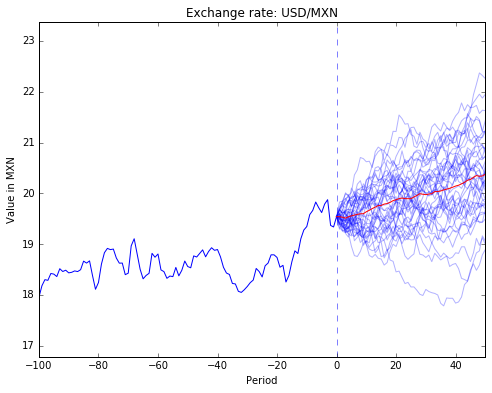

The expected value of the exchange rate in 50 periods is: 20.37744350983801


20.37744350983801

In [10]:
a.montecarlo_simul(periods = 50, tr_y = 40)

Conventionally, this simulation assumes a normal distribution. Use the non parametric distribution of the returns by activating: non_parametric = True

In [ ]:
# work in progress
# a.montecarlo_simul(non_parametric = True)

### Self-information and entropy 

The **self-information** of an event, say $x_i$, is determinend by its probability of occurance $P(x_i)$. The realization of an event whose probability is 1 represents no new information at all (because it was prevoiusly expected or known a priori). Otherwise, a highly improbable outcoume must contain a significant amount of information (or surprise). 

Therefore, the measeure of the amount of information of the event $x_i$ must be a function $I$ such that:
$$ I(x_i) = f(P(x_i))$$

Where $f = 0$ when $P(x_n) = 1$ and  $f > 0$ when $P(x_n) < 1$. 


To acheive this property (and [others](https://en.wikipedia.org/wiki/Self-information)) the log() function is used as following: 

$$ I(x_i) = -\log{ P(x_i)} $$

The expected value of the self-information of a random event is called **information-entropy**. This measure represents the degree of unpredictability of the variable. 

Say that the event $x_i$ is a realization of a discreate random variable denoted by $X$ with space ${x_1, x_2, ..., x_n}$ and probability mass $P(X)$ for each $x_i$. Then the information-entropy **H** is:

$$ H(X) = \sum_{i = 1}^n P(x_i) I(x_i) = \sum_{i = 1}^n P(x_i) \log{ \frac{1}{P(x_i)}} $$

EXAMPLE: 

A random variable $N$ that can take the value of ${n_1, n_2}$ with probability $P(n_1) = p$ and $P(n_2) = 1 - p$.

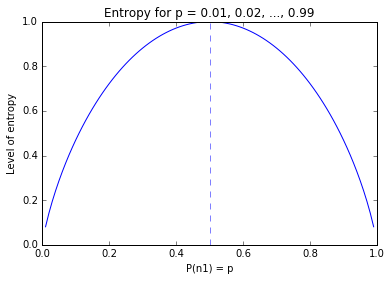

In [77]:
step = 0.01
p = np.arange(step,1,step)
entropy = lambda x: x*np.log2(1/x)
H = list(map(lambda x: entropy(x) + entropy(1-x), p))

plt.figure()
plt.plot(p, H)
plt.axvline(x=0.5, alpha = 0.5, ls = '--')
plt.title('Entropy for p = {}, {}, ..., {}'.format(step,2*step, 1-step))
plt.xlabel('P(n1) = p')
plt.ylabel('Level of entropy')
plt.show()

As it can be seen, the maximum level of entropy or unpredictibility for a binary random variable it's when the probability is uniform (p = 0.5 and 1 - p = 0.5).

Type Currency allows to perform a basic entropy calculation on the returns as a binary variable (i.e. the values > 0 are 1 and anything else is 0).


In [97]:
a.entropy()

0.99751648714535968

The previous entropy was calculated with all the data available in a.returns.Adj_close. We can arbitrarly change this by defining init_t as a string indicating the initial day and delta as an int that represent the number of days to take into account after init_t. By default, init_t is the first date and delta is the maximum number of dates it can take. 



In [98]:
a.entropy(init_t = '2015/06/01', delta = 32)

0.94268318925549222

There is also a method to find the optimum delta that generates the minimum average entropy in the series of the empiral data. 

In [12]:
# work in progress
#a.mindelt_entropy()

The minimun average entropy is produced by a delta of 14 in this case. In general, the minimun entropy will be the minimun delta required (14 is the default). 

In [106]:
a.entropy(delta = 14)

0.99403021147695658

### Binary Transformations

[not quite accurate]

For the entropy we "transformed" the retruns of series into a binary variable; 1 when $r > 0$ and 0 when $r \leq 0$. Therefore, the information is regarded as: '0100111101000100111'. This is a first level binary transformation. 

A second level transformation takes the possible outputs of the combination of the symbols '0' and '1' and rewrites then with another symbol;
* 00 - q
* 01 - w
* 10 - e
* 11 - r

A third level transformation performs this operation on the second level. 
* qwer - q
* qwre - w
* qewr - e
* qerw - r
* qrwe - t
* qrew - y

* wqer - y
* wqre - u
* weqr - i
* werq - o
* wrqe - p
* wreq - a

* eqwr - s
* eqrw - d
* ewqr - f
* ewrq - g
* erwq - h
* erqw - j

* rqwe - k
* rqew - l
* rweq - z
* rwqe - x
* rewq - c
* reqw - v


In [7]:
b = '0100111101000100111'
list(set(b))

['1', '0']

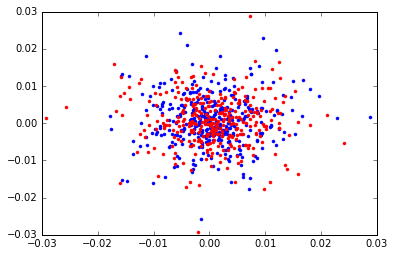

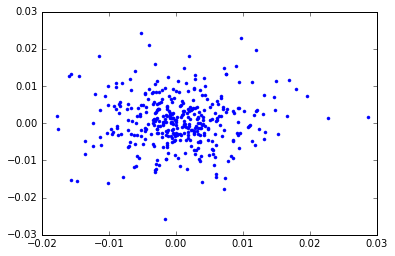

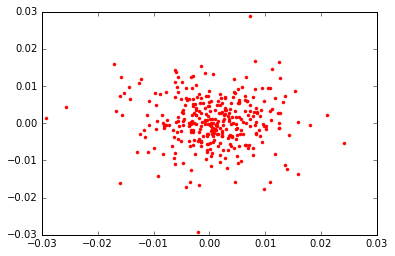

In [103]:
# general mask, index of returns > 0
g_mask = a.binary_rend()[2:]
av_ind = np.arange(2,len(a.returns.Adj_close))
indz = av_ind[g_mask]

g_maskn = (a.binary_rend() == False)[2:]
av_indn = np.arange(2,len(a.returns.Adj_close))
indzn = av_ind[g_maskn]


# index...
id1 = (indz - 1)
id2 = (indz - 2)

id1n = (indzn - 1)
id2n = (indzn - 2)

# one step before
r1t = a.returns.Adj_close.iloc[id1]
r1f = a.returns.Adj_close.iloc[id1n]

# two steps before
r2t = a.returns.Adj_close.iloc[id2]
r2f = a.returns.Adj_close.iloc[id2n]

plt.figure()
plt.plot(r1t,r2t,'.b', r1f,r2f,'.r')
plt.show()

plt.figure()
plt.plot(r1t,r2t,'.b')
plt.show()

plt.figure()
plt.plot(r1f,r2f,'.r')
plt.show()


In [104]:
a.binary_rend()

array([False,  True, False, False, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False,

In [117]:
a.returns.Adj_close.mean()

0.0005665314640691066

In [214]:
np.min([np.min(a.prices.Adj_close.values[-100:]), np.min(m)]) - 1 

17.055999999999997

In [241]:
mean_value[-1]

20.02414582416759